In [51]:
%matplotlib inline

# ANN with 2F

This code:
- Classifies astrophysical sources into two groups using two features and a neural network.
- Uses stratified repeated k-fold cross-validation to ensure robust evaluation.
- Collects accuracy, true positive rate, and true negative rate.
- Predicts class probabilities for unknown (unlabeled) sources (unids).
- Writes out those probabilities for downstream analysis.

Then
1. Loads unID object features and neural network prediction results.
2. Reshapes and organizes prediction probabilities by object.
3. Computes mean and standard deviation of predicted probabilities across multiple models.
4. Prepares for threshold-based classification of unIDs (based on p_cut).

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import sklearn
import seaborn as sns

In [53]:
XY_bal_log_Rel= np.genfromtxt('XY_bal_log_Rel.txt',dtype='str') 
XY_bal_log_Rel_data = np.asarray(XY_bal_log_Rel[1::,:],dtype=float)
print('Columns: ', XY_bal_log_Rel [0,:])

print('Shape of XY_bal_log_Rel_data: ', XY_bal_log_Rel_data.shape)


XY_bal_log_Rel_data_sigma0=np.zeros([0,XY_bal_log_Rel_data.shape[1]])

sigmaastro=0

for i in range (0,len(XY_bal_log_Rel_data)):
    if XY_bal_log_Rel_data[i,2]>=sigmaastro: #remeber column are 0=beta, 1=beta_err, 2=E_peak, 3=sigma, 4=curv_sign
        XY_bal_log_Rel_data_sigma0=np.concatenate( (XY_bal_log_Rel_data_sigma0, [XY_bal_log_Rel_data[i,:]] ) , axis=0)


XY_bal_log_Rel_data=XY_bal_log_Rel_data_sigma0

X_bal_log_Rel_data= XY_bal_log_Rel_data[:,[0,1]] # This selects only columns 0 and 1 (shape: (n, 2)), 
Y=XY_bal_log_Rel_data[:,4]
print('Shape of X_bal_log_Rel_data:', X_bal_log_Rel_data.shape)
print('Shape of Y: ', Y.shape)
print('10**XY_bal_log_Rel_data[:,2].min() ---- ', 10**XY_bal_log_Rel_data[:,2].min())
print('Y: ', Y)

Columns:  ['E_peak' 'beta' 'sigma' 'beta_Rel' '0,1=astro,DM']
Shape of XY_bal_log_Rel_data:  (5662, 5)
Shape of X_bal_log_Rel_data: (5662, 2)
Shape of Y:  (5662,)
10**XY_bal_log_Rel_data[:,2].min() ----  4.056
Y:  [0. 0. 0. ... 1. 1. 1.]


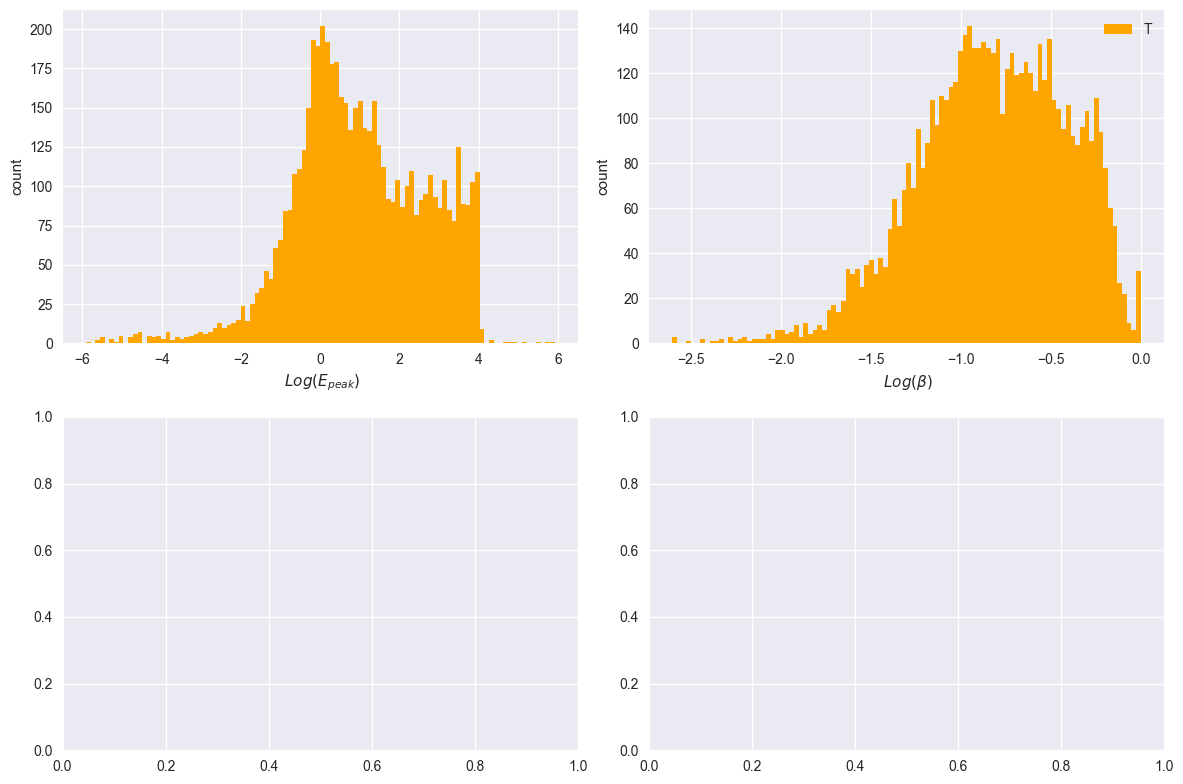

In [54]:

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

#colors = ['red', 'tan', 'lime']
ax0.hist(X_bal_log_Rel_data[:,[0]], 100, color='orange')
#ax0.hist(DM_log_bal_Rel[:,[0]], 100, color='m')
#ax0.hist(unids_log[:,[0]], 100, color='red')
#ax0.legend(prop={'size': 10})
#ax0.set_title('Epeak distribution')
ax0.set_xlabel(r' $Log(E_{peak})$')
ax0.set_ylabel('count')

ax1.hist(X_bal_log_Rel_data[:,[1]], 100, color='orange')
#ax1.hist(DM_log_bal_Rel[:,[1]], 100, color='m')
#ax1.hist(unids_log[:,[1]], 100,color='red')
ax1.legend(('TOT: Astro+DM'))
#ax1.set_title('Beta distribution')
ax1.set_xlabel(r' $Log(\beta)$')
ax1.set_ylabel('count')

"""
ax2.hist(X_bal_log_Rel_data[:,[2]], 100, color='orange')
#ax2.hist(DM_log_bal_Rel[:,[2]], 100, color='m')
#ax2.hist(unids_log[:,[2]], 100, color='red')
#ax2.set_title('sigma distribution')
ax2.set_xlabel(r' $Log(\sigma_{TS})$')
ax2.set_ylabel('count')
"""

"""
ax3.hist(X_bal_log_Rel_data[:,[3]], 100, color='orange')
#ax3.hist(DM_log_bal_Rel[:,[3]], 100, color='m')
#ax3.hist(unids_log[:,[3]], 100, color='red')
#ax3.set_title('beta_err distribution')
ax3.set_xlabel(r' $Log(\beta_{rel})$')
ax3.set_ylabel('count')
"""

fig.tight_layout()
plt.show()

#fig.savefig("histo_tot_data_bal.pdf", bbox_inches='tight')

In [55]:
"""
print('sigma max',10**X_bal_log_Rel_data[:,2].max())
print('sigma min',10**X_bal_log_Rel_data[:,2].min())
print('log sigma max',X_bal_log_Rel_data[:,2].max())
print('log sigma min',X_bal_log_Rel_data[:,2].min())
np.log10(100)
"""

"\nprint('sigma max',10**X_bal_log_Rel_data[:,2].max())\nprint('sigma min',10**X_bal_log_Rel_data[:,2].min())\nprint('log sigma max',X_bal_log_Rel_data[:,2].max())\nprint('log sigma min',X_bal_log_Rel_data[:,2].min())\nnp.log10(100)\n"

In [56]:
# Count the number of instances in each class of the binary label vector Y (0=astro, 1=DM)
NDM_sample=0

for i in range(0,len(Y)):
       if Y[i]==1: 
        NDM_sample=NDM_sample+1

print (NDM_sample)

Nastro_sample=0

for i in range(0,len(Y)):
       if Y[i]==0: 
        Nastro_sample=Nastro_sample+1
        
print (Nastro_sample)        

2831
2831


In [57]:

X_log=X_bal_log_Rel_data

#normalizer = sklearn.preprocessing.StandardScaler()
#normalizer.fit(X_log)
#print('StandardSaler mean', normalizer.mean_)
#X_log = normalizer.transform(X_log)

#X_log = np.log10(X_log)

print(X_log.shape)
print(X_log[1:5,0])
print(X_log[1:5,1])


print(Y.shape)

(5662, 2)
[0.70814035 0.22474019 0.25731851 0.32611046]
[-1.73752546e-04 -5.81201709e-01 -5.61932550e-01 -1.10017950e+00]
(5662,)


In [58]:
# Loading and Preprocessing New Data (unids)
unids_3F = np.genfromtxt('unids_3F_beta_err_names.txt',dtype='str') 
unids_3F_data = np.asarray(unids_3F[1::,:],dtype=float)

print(unids_3F[0,:])

unids_log=np.log10(unids_3F_data[:,[0,1]])
print(unids_log.shape)

['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
(1125, 2)


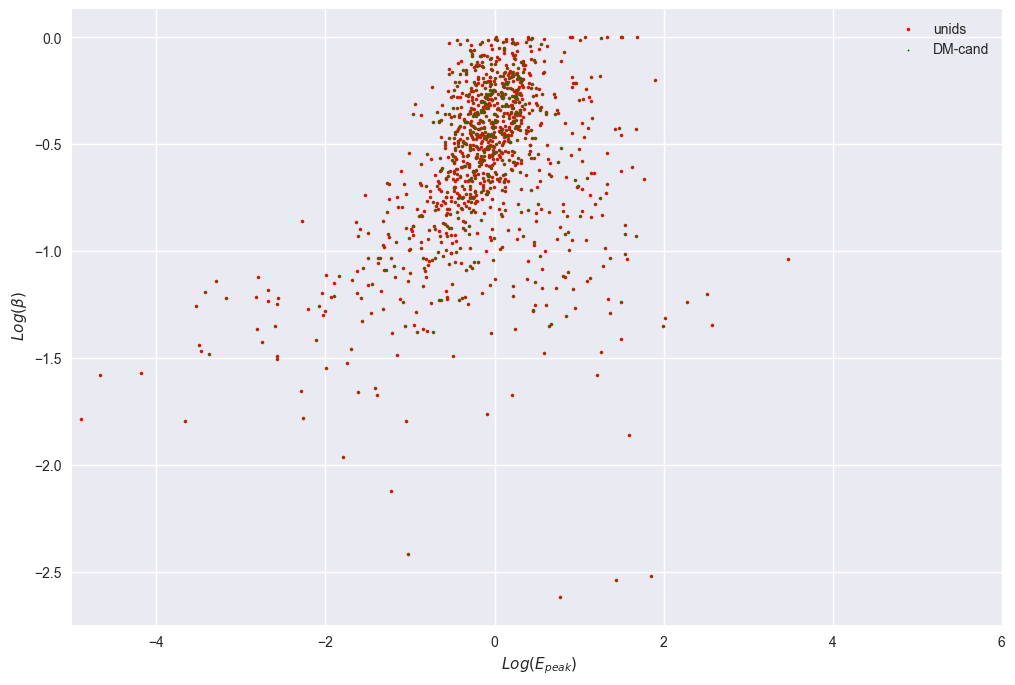

In [59]:
import matplotlib.pyplot as plt

f = plt.figure()
plt.scatter(unids_log[:,0],unids_log[:,1], color='red',label='unids',s=5)
plt.scatter(np.log10(unids_3F_data[:,0]),np.log10(unids_3F_data[:,1]), 
          color='green',label='DM-cand',s=1)
#plt.errorbar(selected_unIDs_80[:,0], selected_unIDs_80[:,1], yerr=selected_unIDs_80[:,3], fmt="o")

plt.ylabel(r' $Log(\beta)$')
plt.xlabel(r' $Log(E_{peak})$')
plt.xlim(-5,6)

plt.legend()
plt.show()

# ANN

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [61]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

normalizer = sklearn.preprocessing.StandardScaler()

N_splits=5 #25% of testing set with N_splits=4, but we lost the easy 5 statitics in each bin
N_Repeats=2
#N_sample=N_splits*N_Repeats

OA=[]
TN=[]
TP=[]
#unIDs_std_proba_check_repeated_rs_stats_all=np.array((1,))

#OA_rs_stats=open("OA_rs_stats.txt", "w")
#OA_rs_stats.write('seed_value OA \n') 
#TN_rs_stats=open("TN_rs_stats.txt", "w")
#TN_rs_stats.write('seed_value TN \n') 
#TP_rs_stats=open("TP_rs_stats.txt", "w")
#TP_rs_stats.write('seed_value TP \n') 

unids_DM_std_proba_check_repeated_kfold_2F_21=open("unids_DM_std_proba_check_repeated_kfold_2F_21.txt", "w")
unids_DM_std_proba_check_repeated_kfold_2F_21.write('Numb unids_DM_proba_check_repeated_kfold \n') 


"""
------------------------------- Setting Up Cross-Validation -----------------------------------
Splits the data into stratified folds (preserving class ratio) for better generalization
Total 10 splits (5-fold repeated 2 times)
-----------------------------------------------------------------------------------------------
"""
rskf = RepeatedStratifiedKFold(n_splits=N_splits, n_repeats=N_Repeats)
rskf.get_n_splits(X_log, Y)
print('rskf',rskf)



"""
--------------------------------------- Classifier Setup --------------------------------------
A neural net with:
        - One hidden layer of 21 neurons.
        - ReLU activation.
        - Learning rate of 0.015.
        - 1000 max iterations.
        - Adam optimizer.
        - No L2 regularization (alpha=0.0).
-----------------------------------------------------------------------------------------------
"""
ANN = MLPClassifier(solver='adam', alpha=0.0, batch_size=120, hidden_layer_sizes=(21,), 
                 learning_rate_init=0.015, max_iter=1000, random_state=None, activation='relu')



""" 
--------------------------------- Training + Evaluation Loop ----------------------------------
For each cross-validation split:
1. Train-test split based on fold.
2. Standardize the features using StandardScaler (fit on training, transform both).
3. Train the MLP (ANN.fit()).
4. Predict:
        - Binary class predictions (predict()).
        - Class probabilities (predict_proba()).
5. Collect metrics:
        - Accuracy (OA).
        - Confusion matrix:
        - TN (True Negative Rate)
        - TP (True Positive Rate
"""    
for train_index, test_index in rskf.split(X_log, Y):
        print('train_index',train_index.shape, "test_index", test_index.shape)
        X_train_split, X_test_split = X_log[train_index], X_log[test_index]
        Y_train_split, Y_test_split = Y[train_index], Y[test_index]
        normalizer.fit(X_train_split)
        X_train_split_std=normalizer.transform(X_train_split)
        X_test_split_std=normalizer.transform(X_test_split)
    
        ANN_fit=ANN.fit(X_train_split_std, Y_train_split)
        Y_test_split_01_std_check=ANN_fit.predict(X_test_split_std)
        Y_test_split_proba_std_check=ANN_fit.predict_proba(X_test_split_std)
        
        OA.extend([accuracy_score(Y_test_split, Y_test_split_01_std_check)])
        conf_matrix=sklearn.metrics.confusion_matrix(Y_test_split, Y_test_split_01_std_check, normalize='true')
        TN.extend([conf_matrix[0,0]])
        TP.extend([conf_matrix[1,1]])
        
        
        "------------------------------------ Predict on Unidentified Sources --------------------------------------"
        unids_std_check=normalizer.transform(unids_log)
        unIDs_std_proba_check_repeated_kfold=ANN_fit.predict_proba(unids_std_check)
        """ 
        For each split, the model is also applied to the unids_log dataset (unlabeled sources),  nd it writes out the probability of being class 1 for each one.
        This provides multiple predictions across different models/splits.

        This writes a file: "unids_DM_std_proba_check_repeated_kfold_2F_21.txt" which contains, for each fold/repeat:
                - Column 0: the unID index (from 0 to N_unids-1)
                - Column 1: the predicted probability of being DM-like from that fold
        """
        for i in range(0,len(unids_std_check)):
                #unIDs_std_proba_check_repeated_rs_stats_all[i]=np.append(ANN_fit.predict_proba(unids_std_check)[i,1])
                unids_DM_std_proba_check_repeated_kfold_2F_21.write('{} {} \n'.format(i, 
                                                                    unIDs_std_proba_check_repeated_kfold[i,1]))
   

       # OA_rs_stats.write('{} {} \n'.format(seed_value[j], OA[j]))
        #TN_rs_stats.write('{} {} \n'.format(seed_value[j], TN[j]))
        #TP_rs_stats.write('{} {} \n'.format(seed_value[j], TP[j]))  

    
unids_DM_std_proba_check_repeated_kfold_2F_21.close()

#OA_rs_stats.close()
#TN_rs_stats.close()
#TP_rs_stats.close()


print('X_train_split.shape', X_train_split.shape)
print('X_test_split.shape', X_test_split.shape)

#unIDs_std_proba_check_repeated_rs_stats=np.array(unIDs_std_proba_check_repeated_rs_stats)
#print('unIDs_std_proba_check_repeated_rs_stats.shape',unIDs_std_proba_check_repeated_rs_stats.shape)
#print(unIDs_std_proba_check_repeated_rs_stats[0:3,:])

OA=np.array(OA)
#OA=np.reshape(OA,(len(unids_std_check),(N_sample)))
TN=np.array(TN)
#TN=np.reshape(TN,(len(unids_std_check),(N_sample)))
TP=np.array(TP)
#TP=np.reshape(TP,(len(unids_std_check),(N_sample)))



rskf RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=None)
train_index (4529,) test_index (1133,)
train_index (4529,) test_index (1133,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
train_index (4529,) test_index (1133,)
train_index (4529,) test_index (1133,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
X_train_split.shape (4530, 2)
X_test_split.shape (1132, 2)


In [62]:
print(OA.shape)
#print(OA)
print('OA mean', OA.mean(), 'OA std',OA.std(ddof=1))
print('TN mean', TN.mean(), 'TN std',TN.std(ddof=1))
print('TP mean', TP.mean(), 'TP std',TP.std(ddof=1))
print(unIDs_std_proba_check_repeated_kfold.shape)

(10,)
OA mean 0.8632109631080436 OA std 0.00955991138121876
TN mean 0.8724739967967295 TN std 0.035819623070314735
TP mean 0.8539386517596176 TP std 0.027050175344865705
(1125, 2)


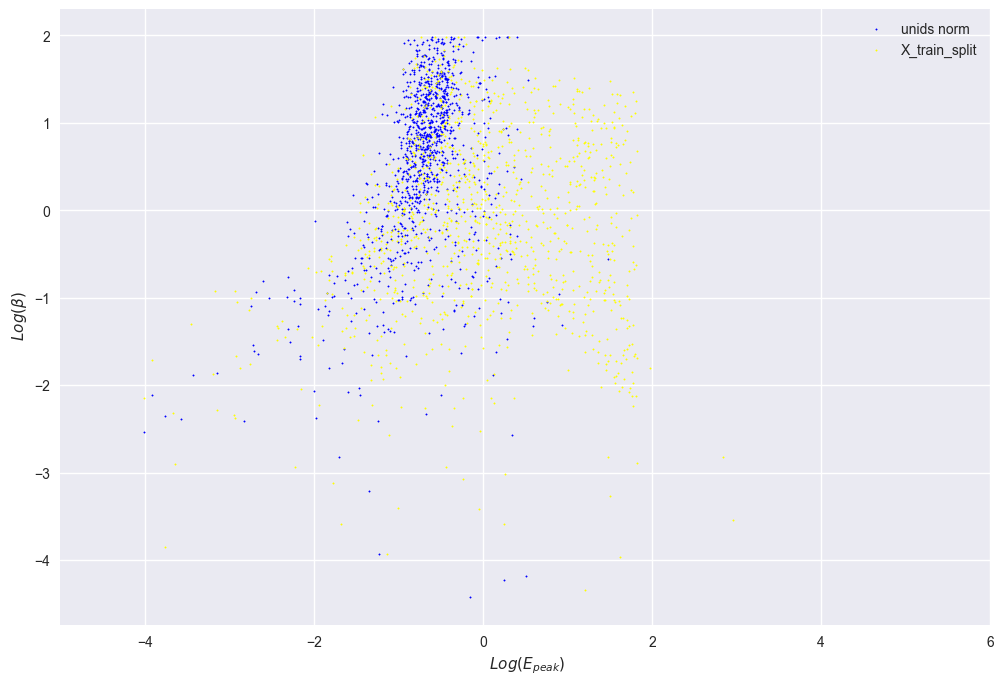

In [63]:
import matplotlib.pyplot as plt

f = plt.figure()
#plt.scatter(unids_log[:,0],unids_log[:,1], color='red',label='unids log',s=5)
#plt.scatter(np.log10(unids_3F_data[:,0]),np.log10(unids_3F_data[:,1]), 
         # color='green',label='unids lin data',s=1)
plt.scatter(unids_std_check[:,0],unids_std_check[:,1], 
          color='blue',label='unids norm',s=1)
plt.scatter(X_test_split_std[:,0],X_test_split_std[:,1], 
          color='yellow',label='X_train_split',s=1)
#plt.errorbar(selected_unIDs_80[:,0], selected_unIDs_80[:,1], yerr=selected_unIDs_80[:,3], fmt="o")

plt.ylabel(r' $Log(\beta)$')
plt.xlabel(r' $Log(E_{peak})$')
plt.xlim(-5,6)

plt.legend()
plt.show()

In [64]:
from matplotlib.patches import Patch

cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.5],
        xlim=[0, len(X_log)],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

/Users/martacaninoromero/DarkMatter_ML_TFG/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by RepeatedStratifiedKFold
  warnings.warn(
/Users/martacaninoromero/DarkMatter_ML_TFG/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:877: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
/Users/martacaninoromero/DarkMatter_ML_TFG/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:877: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


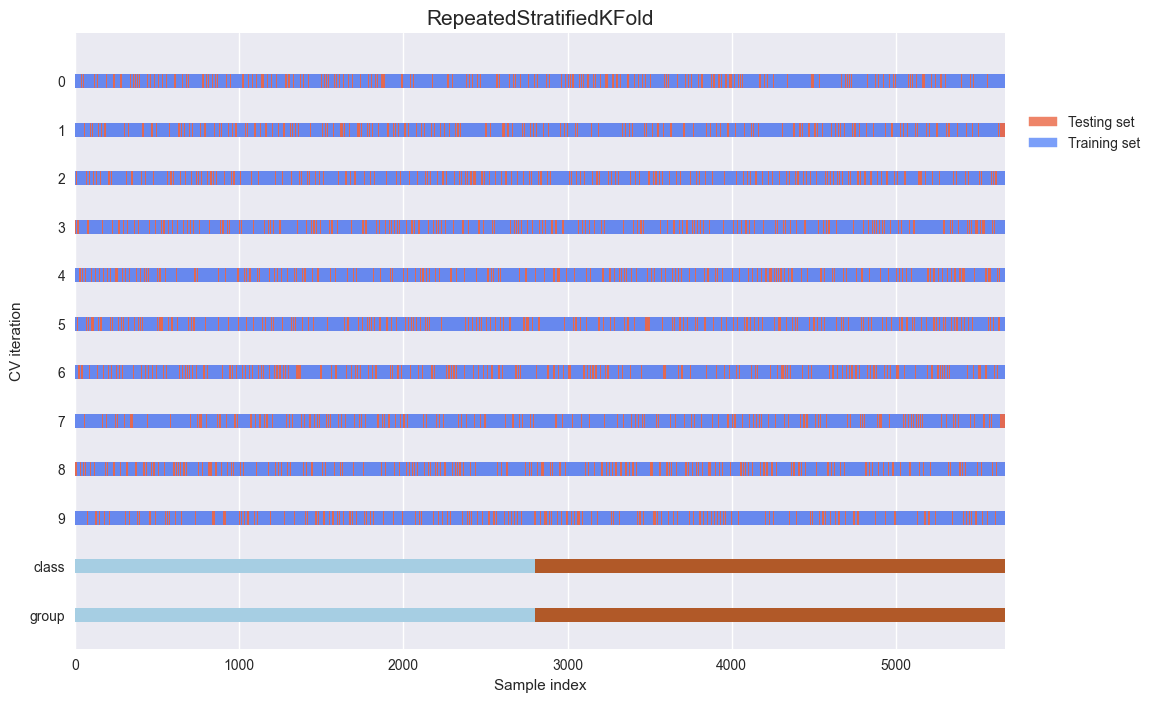

In [65]:
fig, ax = plt.subplots()
cv = rskf
plot_cv_indices(cv, X_log , Y, Y ,ax, N_splits*N_Repeats)
ax.axes
ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.2))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )

#fig.savefig("Reapeated5_Kfold5_split.pdf", bbox_inches='tight')

# unIDs classification with errors

Objective
To compute the mean and standard deviation of predicted probabilities (to be class 1 = DM-like) for each unID source, across multiple runs of the trained classifier (from the previous MLPClassifier code).

In [66]:

# Load unID source data
unids_3F = np.genfromtxt('unids_3F_beta_err_names.txt',dtype='str') 
unids_3F_data = np.asarray(unids_3F[1::,:],dtype=float)

print(unids_3F[0,:])

unids_log=np.log10(unids_3F_data[:,[0,1]])
print(unids_log.shape)

['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
(1125, 2)


In [67]:
""" 
Load model prediction outputs
    - Loads the probabilities written during each fold of training.
    - Assumes format: [index, probability] for each unID, per split.
"""
unids_DM_std_proba_repeated_kfold= np.genfromtxt('unids_DM_std_proba_check_repeated_kfold_2F_21.txt',dtype='str') 
unids_DM_std_proba_data_repeated_kfold=np.asarray(unids_DM_std_proba_repeated_kfold[1::],dtype=float)
print(unids_DM_std_proba_data_repeated_kfold[0,:])
print(unids_DM_std_proba_data_repeated_kfold[1,:])

#N_splits=5
#N_Repeats=3

print('unids_DM_std_proba_data_repeated_kfold.shape',unids_DM_std_proba_data_repeated_kfold.shape)
print(unids_DM_std_proba_data_repeated_kfold[0,0:3])
print(unids_DM_std_proba_data_repeated_kfold[1,0:3])
print(unids_DM_std_proba_data_repeated_kfold[2,0:3])


[0.00000000e+00 1.29753164e-11]
[1.         0.41447292]
unids_DM_std_proba_data_repeated_kfold.shape (11250, 2)
[0.00000000e+00 1.29753164e-11]
[1.         0.41447292]
[2.        0.4901141]


In [68]:

#defining an array where each column is the probability to be DM for each unIDs in each split

#defining an array where each column is the probability to be DM for each unIDs in each split

""" 
Extract useful variables
      - N_unids: number of unID sources.
      - N_sample: number of times each unID was evaluated = number of folds × repeats.
"""
N_unids=unids_log.shape[0]
print('N_unids',N_unids)

#N_splits=3
#N_Repeats=10

N_sample=N_splits*N_Repeats
print('N_sample',N_sample)

print(unids_DM_std_proba_data_repeated_kfold.shape)

""" 
Reshape probability data. Purpose:
      Build a structured array where:
            - First column = unID index
            - Remaining columns = predicted probabilities across each of the N_sample splits
      This assumes the file ordering is consistent and that predictions are block-structured:
            - First N_unids rows = fold 1
            - Second N_unids rows = fold 2
            -  ...
"""
unids_number=unids_DM_std_proba_data_repeated_kfold[0:N_unids,0]

print('unids number',unids_number)
print('unids number shape',unids_number.shape)

unids_DM_std_proba_N_sample_repeated_kfold=np.zeros((N_unids,(N_sample+1)))

unids_DM_std_proba_N_sample_repeated_kfold[:,0]=unids_number[:].astype(int)
unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)]=np.reshape(
unids_DM_std_proba_data_repeated_kfold[:,1],(N_unids,(N_sample)))

print('unids_DM_std_proba_N_sample_repeated_kfold.shape', 
      unids_DM_std_proba_N_sample_repeated_kfold.shape)
print(unids_DM_std_proba_N_sample_repeated_kfold)

#unids_DM_std_proba_N_sample_repeated_kfold=np.array(unids_DM_std_proba_N_sample_repeated_kfold)

#unids_int_prob=float((unids_DM_std_proba_N_sample_repeated_kfold[:,1].T))
#print(unids_int_prob)

N_unids 1125
N_sample 10
(11250, 2)
unids number [0.000e+00 1.000e+00 2.000e+00 ... 1.122e+03 1.123e+03 1.124e+03]
unids number shape (1125,)
unids_DM_std_proba_N_sample_repeated_kfold.shape (1125, 11)
[[0.00000000e+00 1.29753164e-11 4.14472920e-01 ... 5.22361043e-12
  3.18251535e-01 1.22318865e-03]
 [1.00000000e+00 1.87045180e-31 3.34047237e-45 ... 5.88175393e-04
  1.68778781e-39 4.63323442e-01]
 [2.00000000e+00 1.63164776e-84 3.99674136e-17 ... 1.37501967e-05
  1.24393491e-07 5.21626344e-01]
 ...
 [1.12200000e+03 2.50294772e-01 4.67594076e-01 ... 4.72359979e-01
  8.00933717e-01 3.98573041e-01]
 [1.12300000e+03 2.84532571e-01 3.04577762e-01 ... 8.15943906e-15
  6.44297093e-17 3.21296529e-01]
 [1.12400000e+03 4.75160588e-01 1.55953435e-82 ... 7.06278739e-13
  4.10826522e-44 4.30176795e-01]]


In [69]:

""" 
Compute statistics
    - unids_mean: average probability of being DM-like across all splits
    - unids_std: standard deviation of that probability — gives a measure of confidence
"""
unids_mean=unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)].mean(axis=1)
unids_std=unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)].std(axis=1,ddof=1)
print('unids_mean', unids_mean, 'unids std',unids_std)
print(unids_mean.shape)

""" 
Define Probability Thresholds
    - mean_prob ≥ 0.90 (strong candidate)
    - mean_prob ≥ 0.50 (moderate candidate)
"""
p_cut=0.90
p_cut_50=0.50

unids_mean [0.18085615 0.13842049 0.25378412 ... 0.36415901 0.2340921  0.21105327] unids std [0.1994932  0.20892328 0.34858921 ... 0.295956   0.21850468 0.22841324]
(1125,)


In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


In [71]:
# Configuration and data loading
# Configuration
N_splits = 5
N_Repeats = 2
N_sample = N_splits * N_Repeats

print(f"Cross-validation setup: {N_splits} splits × {N_Repeats} repeats = {N_sample} total folds")

# Load unID source data
unids_3F = np.genfromtxt('unids_3F_beta_err_names.txt', dtype='str') 
unids_3F_data = np.asarray(unids_3F[1::, :], dtype=float)
feature_names = unids_3F[0, :]

print(f"Feature names: {feature_names}")
print(f"UnID data shape: {unids_3F_data.shape}")

# Create log-transformed features (F_peak and beta)
unids_log = np.log10(unids_3F_data[:, [0, 1]])
print(f"Log-transformed features shape: {unids_log.shape}")

Cross-validation setup: 5 splits × 2 repeats = 10 total folds
Feature names: ['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
UnID data shape: (1125, 5)
Log-transformed features shape: (1125, 2)


In [72]:
# Load model prediction outputs
unids_DM_std_proba_repeated_kfold = np.genfromtxt('unids_DM_std_proba_check_repeated_kfold_2F_21.txt', dtype='str') 
unids_DM_std_proba_data_repeated_kfold = np.asarray(unids_DM_std_proba_repeated_kfold[1::], dtype=float)

print(f"Predictions data shape: {unids_DM_std_proba_data_repeated_kfold.shape}")
print(f"First few predictions:")
print(unids_DM_std_proba_data_repeated_kfold[:5, :])

# Get number of unidentified sources
N_unids = unids_log.shape[0]
print(f"Number of unidentified sources: {N_unids}")

Predictions data shape: (11250, 2)
First few predictions:
[[0.00000000e+00 1.29753164e-11]
 [1.00000000e+00 4.14472920e-01]
 [2.00000000e+00 4.90114096e-01]
 [3.00000000e+00 3.16355263e-01]
 [4.00000000e+00 2.68144500e-01]]
Number of unidentified sources: 1125


In [73]:
# Extract unID indices from first N_unids rows
unids_number = unids_DM_std_proba_data_repeated_kfold[0:N_unids, 0]
print(f"UnID indices shape: {unids_number.shape}")

# Create probability matrix: rows = unIDs, columns = CV folds + index
unids_DM_std_proba_N_sample_repeated_kfold = np.zeros((N_unids, N_sample + 1))

# Fill in the data
unids_DM_std_proba_N_sample_repeated_kfold[:, 0] = unids_number[:].astype(int)
unids_DM_std_proba_N_sample_repeated_kfold[:, 1:(N_sample + 1)] = np.reshape(
    unids_DM_std_proba_data_repeated_kfold[:, 1], (N_unids, N_sample)
)

print(f"Probability matrix shape: {unids_DM_std_proba_N_sample_repeated_kfold.shape}")
print("First few rows of probability matrix:")
print(unids_DM_std_proba_N_sample_repeated_kfold[:5, :])

UnID indices shape: (1125,)
Probability matrix shape: (1125, 11)
First few rows of probability matrix:
[[0.00000000e+00 1.29753164e-11 4.14472920e-01 4.90114096e-01
  3.16355263e-01 2.68144500e-01 1.11166215e-16 1.04293716e-15
  5.22361043e-12 3.18251535e-01 1.22318865e-03]
 [1.00000000e+00 1.87045180e-31 3.34047237e-45 3.93251908e-01
  1.27051555e-71 4.60404495e-01 5.49310630e-02 1.17058399e-02
  5.88175393e-04 1.68778781e-39 4.63323442e-01]
 [2.00000000e+00 1.63164776e-84 3.99674136e-17 4.15781473e-01
  1.56057109e-02 6.57010208e-01 9.27803606e-01 4.36965608e-69
  1.37501967e-05 1.24393491e-07 5.21626344e-01]
 [3.00000000e+00 5.70625776e-01 1.62568197e-29 3.73504797e-01
  6.17962844e-01 3.54400984e-01 4.68081840e-01 6.79178311e-01
  2.37220762e-22 2.60267635e-01 7.63391915e-29]
 [4.00000000e+00 5.14902790e-01 5.06883950e-01 3.39424364e-01
  1.24751155e-43 8.84789412e-11 7.49562781e-01 1.98503210e-01
  2.10495528e-01 5.91198644e-19 2.79831624e-01]]


Text(0, 0.5, 'count')

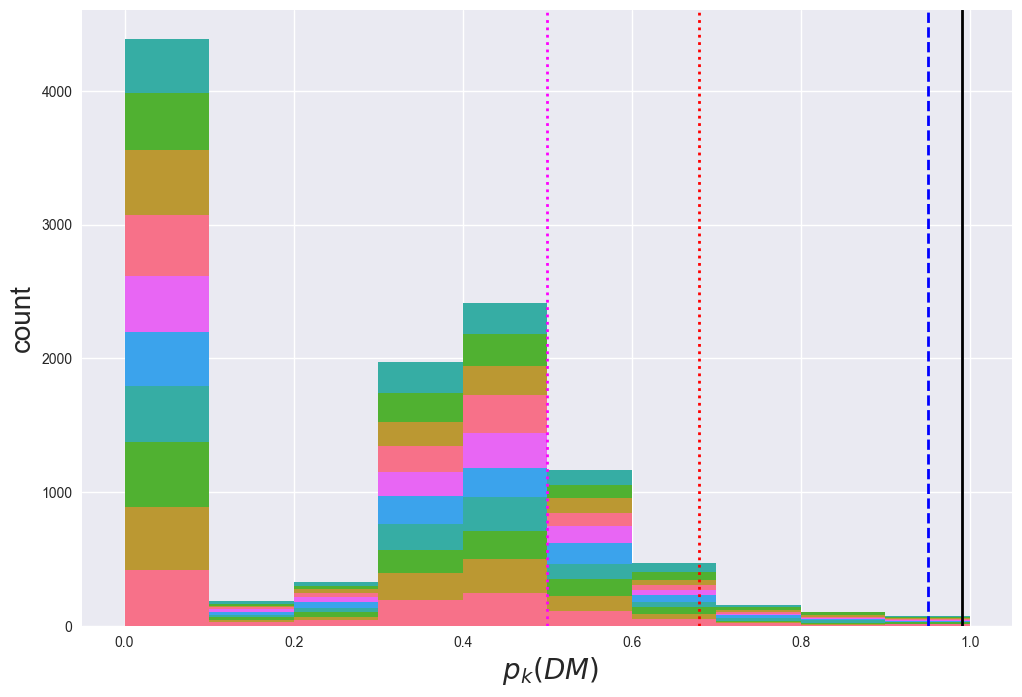

In [74]:
import matplotlib.pyplot as plt

bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

fig, axes = plt.subplots(nrows=1, ncols=1)
#ax0, ax1, ax2 = axes.flatten()
#for i in range(0,len(unids_DM_std_proba_N_sample_repeated_kfold)):
counts_all, bins_all, ignored = plt.hist(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)], 
                                             bins, histtype='barstacked', density=False)
plt.axvline(0.50, color='magenta', linestyle=':', linewidth=2)
plt.axvline(0.68, color='red', linestyle=':', linewidth=2)
plt.axvline(0.95, color='blue', linestyle='--', linewidth=2)
plt.axvline(0.99, color='black', linestyle='-', linewidth=2)
#plt.axvline(value_unID, color='k', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='--', linewidth=1)

plt.xlabel(r' $p_k(DM)$',size=20)
plt.ylabel('count',size=20)

#fig.savefig("full_histo_2F.pdf", bbox_inches='tight')


In [75]:
"""import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1)
#ax0, ax1, ax2 = axes.flatten()

bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

counts_all, bins_all, ignored = plt.hist(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)], 
                                         bins,histtype='barstacked', density=False, color=all_color[i,:])
#plt.scatter(bins_all[:],counts_all[:])
plt.axvline(0.50, color='magenta', linestyle=':', linewidth=1)
plt.axvline(0.68, color='red', linestyle=':', linewidth=1)
plt.axvline(0.90, color='blue', linestyle='--', linewidth=1)
plt.axvline(0.95, color='black', linestyle='--', linewidth=1)
plt.axvline(0.99, color='gray', linestyle='--', linewidth=1)
#plt.axvline(value_unID, color='k', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='--', linewidth=1)

plt.xlabel(r' $p_k^{DM}$',size=15)
plt.ylabel('count',size=15)
plt.title(r' $NN, 2F$', y=10**(0), x=10**(-0.5), pad=-30)
#plt.yscale('log')

#fig.savefig("full_histo_2F_single_count.pdf", bbox_inches='tight')"""



'import matplotlib.pyplot as plt\n\nfig, axes = plt.subplots(nrows=1, ncols=1)\n#ax0, ax1, ax2 = axes.flatten()\n\nbins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]\n\ncounts_all, bins_all, ignored = plt.hist(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)], \n                                         bins,histtype=\'barstacked\', density=False, color=all_color[i,:])\n#plt.scatter(bins_all[:],counts_all[:])\nplt.axvline(0.50, color=\'magenta\', linestyle=\':\', linewidth=1)\nplt.axvline(0.68, color=\'red\', linestyle=\':\', linewidth=1)\nplt.axvline(0.90, color=\'blue\', linestyle=\'--\', linewidth=1)\nplt.axvline(0.95, color=\'black\', linestyle=\'--\', linewidth=1)\nplt.axvline(0.99, color=\'gray\', linestyle=\'--\', linewidth=1)\n#plt.axvline(value_unID, color=\'k\', linestyle=\'-\', linewidth=1)\n#plt.axvline(unids_std.all(), color=\'green\', linestyle=\'-\', linewidth=1)\n#plt.axvline(unids_std.all(), color=\'green\', linestyle=\'--\', linewidth=1)\n\nplt.xlabel(r\' $p

In [76]:
all_color=np.asarray(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)],dtype='str')

print(all_color.shape)

for i in range(0,len(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)])):
    for j in range(0,N_sample):
        all_color[i,j]='midnightblue'

print(len(unids_log))    
print(all_color.shape)
print(all_color)

(1125, 10)
1125
(1125, 10)
[['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ...
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' ... 'midnightblue'
  'midnightblue' 'midnightblue']]


# TFG Marta - Additional analysis 2F

In [77]:
# Extract probability data (excluding index column)
prob_data = unids_DM_std_proba_N_sample_repeated_kfold[:, 1:(N_sample + 1)]

# Compute comprehensive statistics
unids_mean = prob_data.mean(axis=1) # Media - promedio de probabilidad across all folds
unids_std = prob_data.std(axis=1, ddof=1) # Desviación estándar - consistencia, si es baja, el modelo es consistente
unids_median = np.median(prob_data, axis=1) # Mediana - valor central/medio, util si hay outliers
""" 
Si std es muy alta → El modelo es inconsistente para esa fuente
Si mean es alta → El modelo cree que es un buen candidato a materia oscura
Si median es muy diferente a mean → Hay valores extremos
"""
unids_q25 = np.percentile(prob_data, 25, axis=1) # Cuartil 25 - 25% de los valores son menores
unids_q75 = np.percentile(prob_data, 75, axis=1) # Cuartil 75 - 75% de los valores son menores
unids_min = prob_data.min(axis=1) # Valor mínimo - el más bajo
unids_max = prob_data.max(axis=1) # Valor máximo - el más alto

print("Statistics computed successfully!")
print(f"Mean probability: {unids_mean.mean():.4f} ± {unids_mean.std():.4f}")
print(f"Mean uncertainty: {unids_std.mean():.4f} ± {unids_std.std():.4f}")
print(f"Median probability: {np.median(unids_mean):.4f}")


Statistics computed successfully!
Mean probability: 0.2773 ± 0.0755
Mean uncertainty: 0.2367 ± 0.0505
Median probability: 0.2743


In [78]:
# Define thresholds
p_cut_high = 0.90      # High confidence threshold
p_cut_moderate = 0.50  # Moderate confidence threshold
uncertainty_threshold = 0.1  # Low uncertainty threshold

# High confidence candidates
high_conf_mask = unids_mean >= p_cut_high
high_conf_indices = np.where(high_conf_mask)[0]

# Moderate confidence candidates
moderate_conf_mask = (unids_mean >= p_cut_moderate) & (unids_mean < p_cut_high)
moderate_conf_indices = np.where(moderate_conf_mask)[0]

# Low uncertainty candidates (consistent predictions)
low_uncertainty_mask = unids_std <= uncertainty_threshold
low_uncertainty_indices = np.where(low_uncertainty_mask)[0]

# Very high confidence (95% threshold)
very_high_conf_mask = unids_mean >= 0.95
very_high_conf_indices = np.where(very_high_conf_mask)[0]

print(f"HIGH CONFIDENCE candidates (≥{p_cut_high:.0%}): {len(high_conf_indices)}")
print(f"VERY HIGH CONFIDENCE candidates (≥95%): {len(very_high_conf_indices)}")
print(f"MODERATE CONFIDENCE candidates ({p_cut_moderate:.0%}-{p_cut_high:.0%}): {len(moderate_conf_indices)}")
print(f"LOW UNCERTAINTY candidates (std ≤{uncertainty_threshold}): {len(low_uncertainty_indices)}")

if len(high_conf_indices) > 0:
    print(f"\nTop high confidence candidates:")
    for i in high_conf_indices[:5]:
        print(f"  Source {i}: p={unids_mean[i]:.4f} ± {unids_std[i]:.4f}")

HIGH CONFIDENCE candidates (≥90%): 0
VERY HIGH CONFIDENCE candidates (≥95%): 0
MODERATE CONFIDENCE candidates (50%-90%): 0
LOW UNCERTAINTY candidates (std ≤0.1): 7


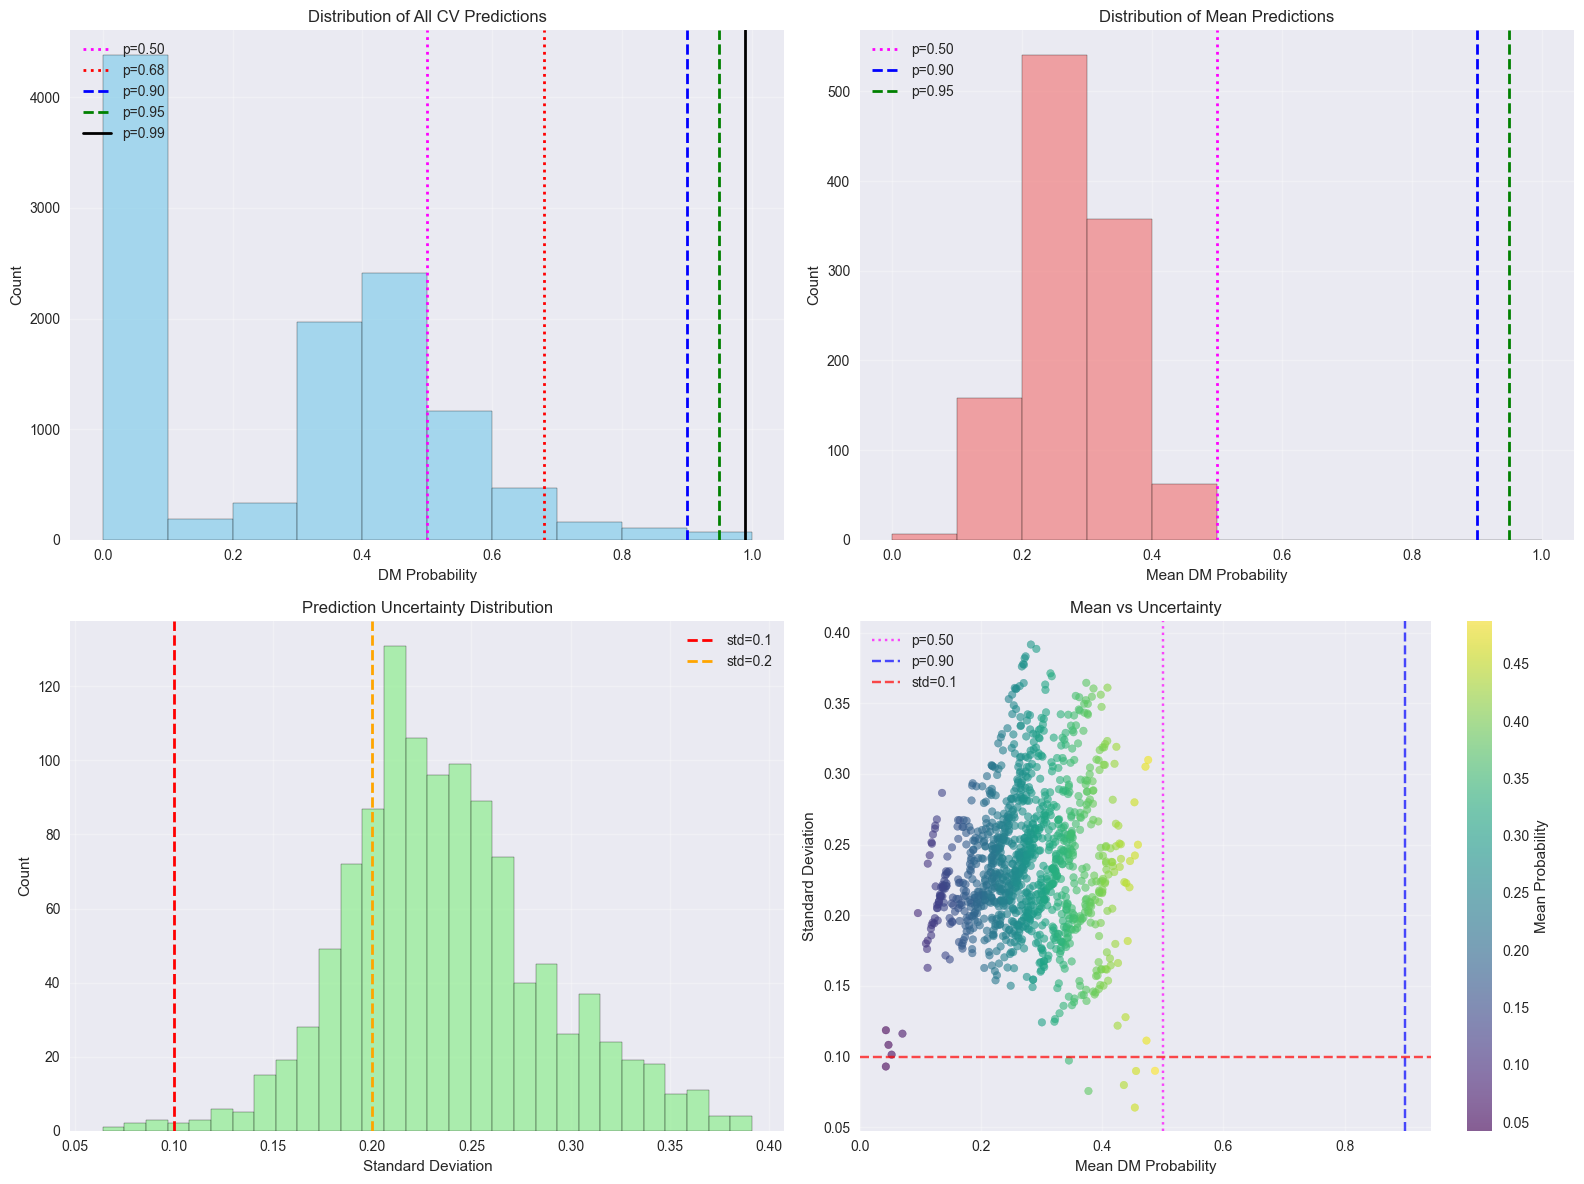

In [79]:
# Create comprehensive probability distribution plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# All predictions histogram (original style)
ax1 = axes[0, 0]
bins = np.arange(0.0, 1.1, 0.1)
counts, bins_edges, _ = ax1.hist(prob_data.flatten(), bins=bins, 
                                alpha=0.7, color='skyblue', edgecolor='black')

ax1.axvline(0.50, color='magenta', linestyle=':', linewidth=2, label='p=0.50')
ax1.axvline(0.68, color='red', linestyle=':', linewidth=2, label='p=0.68')
ax1.axvline(0.90, color='blue', linestyle='--', linewidth=2, label='p=0.90')
ax1.axvline(0.95, color='green', linestyle='--', linewidth=2, label='p=0.95')
ax1.axvline(0.99, color='black', linestyle='-', linewidth=2, label='p=0.99')

ax1.set_xlabel('DM Probability')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of All CV Predictions')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Mean probability distribution
ax2 = axes[0, 1]
ax2.hist(unids_mean, bins=bins, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.axvline(0.50, color='magenta', linestyle=':', linewidth=2, label='p=0.50')
ax2.axvline(0.90, color='blue', linestyle='--', linewidth=2, label='p=0.90')
ax2.axvline(0.95, color='green', linestyle='--', linewidth=2, label='p=0.95')
ax2.set_xlabel('Mean DM Probability')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Mean Predictions')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Uncertainty distribution
ax3 = axes[1, 0]
ax3.hist(unids_std, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
ax3.axvline(0.1, color='red', linestyle='--', linewidth=2, label='std=0.1')
ax3.axvline(0.2, color='orange', linestyle='--', linewidth=2, label='std=0.2')
ax3.set_xlabel('Standard Deviation')
ax3.set_ylabel('Count')
ax3.set_title('Prediction Uncertainty Distribution')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Mean vs Std scatter plot
ax4 = axes[1, 1]
scatter = ax4.scatter(unids_mean, unids_std, alpha=0.6, c=unids_mean, 
                     cmap='viridis', s=30)
plt.colorbar(scatter, ax=ax4, label='Mean Probability')
ax4.axvline(0.50, color='magenta', linestyle=':', alpha=0.7, label='p=0.50')
ax4.axvline(0.90, color='blue', linestyle='--', alpha=0.7, label='p=0.90')
ax4.axhline(0.1, color='red', linestyle='--', alpha=0.7, label='std=0.1')
ax4.set_xlabel('Mean DM Probability')
ax4.set_ylabel('Standard Deviation')
ax4.set_title('Mean vs Uncertainty')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

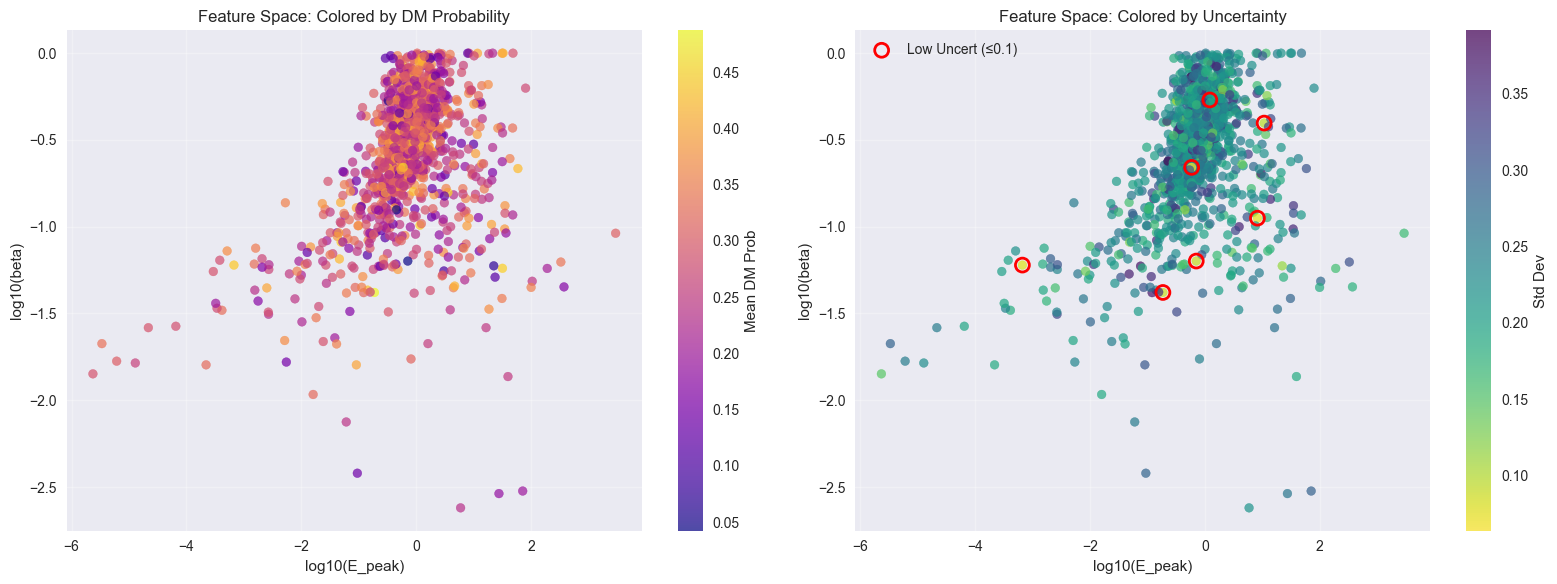

In [80]:
# Feature space analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Feature space colored by mean probability
ax1 = axes[0]
scatter = ax1.scatter(unids_log[:, 0], unids_log[:, 1], 
                     c=unids_mean, cmap='plasma', alpha=0.7, s=40)
plt.colorbar(scatter, ax=ax1, label='Mean DM Prob')
ax1.set_xlabel('log10(E_peak)')
ax1.set_ylabel('log10(beta)')
ax1.set_title('Feature Space: Colored by DM Probability')
ax1.grid(True, alpha=0.3)

# Highlight high confidence candidates
if len(high_conf_indices) > 0:
    ax1.scatter(unids_log[high_conf_indices, 0], unids_log[high_conf_indices, 1], 
               s=100, facecolors='none', edgecolors='red', linewidth=2, 
               label=f'High Conf (≥{p_cut_high:.0%})')
    ax1.legend()

# Feature space colored by uncertainty
ax2 = axes[1]
scatter2 = ax2.scatter(unids_log[:, 0], unids_log[:, 1], 
                      c=unids_std, cmap='viridis_r', alpha=0.7, s=40)
plt.colorbar(scatter2, ax=ax2, label='Std Dev')
ax2.set_xlabel('log10(E_peak)')
ax2.set_ylabel('log10(beta)')
ax2.set_title('Feature Space: Colored by Uncertainty')
ax2.grid(True, alpha=0.3)

# Highlight low uncertainty candidates
if len(low_uncertainty_indices) > 0:
    ax2.scatter(unids_log[low_uncertainty_indices, 0], unids_log[low_uncertainty_indices, 1], 
               s=100, facecolors='none', edgecolors='red', linewidth=2, 
               label=f'Low Uncert (≤{uncertainty_threshold})')
    ax2.legend()

plt.tight_layout()
plt.show()


In [81]:
# Top candidates analysis
# Create DataFrame for top candidates
top_20_indices = np.argsort(unids_mean)[-20:]  # Top 20 by mean probability
top_candidates_df = pd.DataFrame({
    'Source_ID': top_20_indices,
    'Mean_Prob': unids_mean[top_20_indices],
    'Std_Dev': unids_std[top_20_indices],
    'Median_Prob': unids_median[top_20_indices],
    'Min_Prob': unids_min[top_20_indices],
    'Max_Prob': unids_max[top_20_indices],
    'E_peak': unids_3F_data[top_20_indices, 0],
    'Beta': unids_3F_data[top_20_indices, 1],
    'log_E_peak': unids_log[top_20_indices, 0],
    'log_Beta': unids_log[top_20_indices, 1]
})

# Sort by mean probability (descending)
top_candidates_df = top_candidates_df.sort_values('Mean_Prob', ascending=False)
top_candidates_df = top_candidates_df.reset_index(drop=True)

print("TOP 20 DARK MATTER CANDIDATES:")
print("="*80)
display(top_candidates_df.round(4))


TOP 20 DARK MATTER CANDIDATES:


,Source_ID,Mean_Prob,Std_Dev,Median_Prob,Min_Prob,Max_Prob,E_peak,Beta,log_E_peak,log_Beta
0,321,0.4869,0.0900,0.4683,0.3886,0.6489,0.1870,0.0418,-0.7282,-1.3788
1,785,0.4757,0.3099,0.5110,0.0000,0.8559,0.7870,0.2986,-0.1040,-0.5249
2,771,0.4729,0.1113,0.4694,0.3423,0.6644,1.0848,0.2694,0.0353,-0.5696
3,560,0.4712,0.3051,0.4778,0.0000,0.8868,1.4393,0.3499,0.1582,-0.4561
4,750,0.4588,0.2499,0.4272,0.0000,0.9346,0.4100,0.3088,-0.3872,-0.5103
5,546,0.4557,0.0898,0.4353,0.3612,0.6270,1.2265,0.5375,0.0887,-0.2696
6,300,0.4538,0.2423,0.4556,0.0000,0.8843,3.5431,0.1576,0.5494,-0.8024
7,996,0.4537,0.0639,0.4318,0.3937,0.5966,0.5916,0.2197,-0.2280,-0.6582
8,335,0.4531,0.2799,0.4937,0.0000,0.8457,0.6718,0.4090,-0.1728,-0.3883
9,525,0.4457,0.2384,0.4147,0.0000,0.9094,2.6115,0.3131,0.4169,-0.5043


/var/folders/m8/9rd44wvx47j51lczw45sffl40000gn/T/ipykernel_11452/1737556152.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax4.boxplot(valid_data, labels=valid_labels)


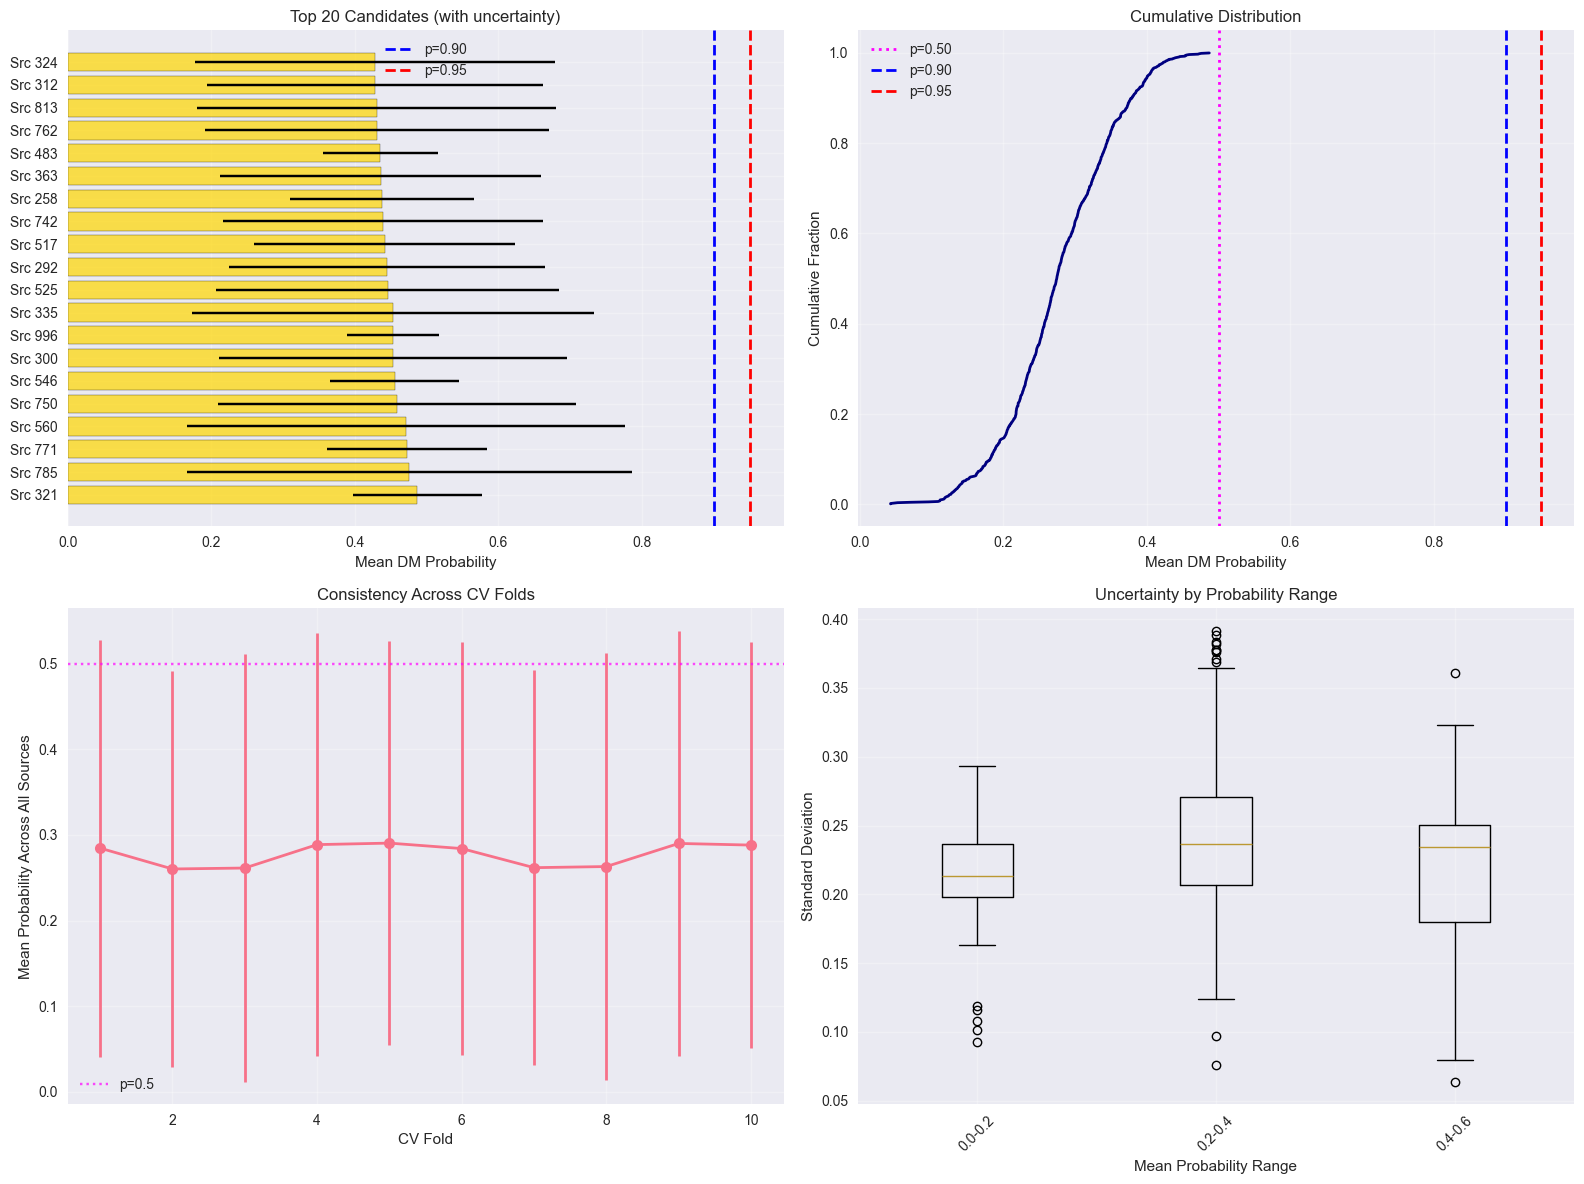

In [82]:
# Visualization of top candidates
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top candidates bar plot
ax1 = axes[0, 0]
y_pos = range(len(top_candidates_df))
bars = ax1.barh(y_pos, top_candidates_df['Mean_Prob'], 
               xerr=top_candidates_df['Std_Dev'], 
               alpha=0.7, color='gold', edgecolor='black')
ax1.axvline(0.90, color='blue', linestyle='--', linewidth=2, label='p=0.90')
ax1.axvline(0.95, color='red', linestyle='--', linewidth=2, label='p=0.95')
ax1.set_yticks(y_pos)
ax1.set_yticklabels([f"Src {idx}" for idx in top_candidates_df['Source_ID']])
ax1.set_xlabel('Mean DM Probability')
ax1.set_title('Top 20 Candidates (with uncertainty)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Cumulative distribution
ax2 = axes[0, 1]
sorted_probs = np.sort(unids_mean)
cumulative = np.arange(1, len(sorted_probs) + 1) / len(sorted_probs)
ax2.plot(sorted_probs, cumulative, linewidth=2, color='navy')
ax2.axvline(0.50, color='magenta', linestyle=':', linewidth=2, label='p=0.50')
ax2.axvline(0.90, color='blue', linestyle='--', linewidth=2, label='p=0.90')
ax2.axvline(0.95, color='red', linestyle='--', linewidth=2, label='p=0.95')
ax2.set_xlabel('Mean DM Probability')
ax2.set_ylabel('Cumulative Fraction')
ax2.set_title('Cumulative Distribution')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Cross-validation fold consistency
ax3 = axes[1, 0]
fold_means = np.mean(prob_data, axis=0)
fold_stds = np.std(prob_data, axis=0)
ax3.errorbar(range(1, N_sample + 1), fold_means, yerr=fold_stds, 
            marker='o', linewidth=2, markersize=8, capsize=5)
ax3.axhline(0.5, color='magenta', linestyle=':', alpha=0.7, label='p=0.5')
ax3.set_xlabel('CV Fold')
ax3.set_ylabel('Mean Probability Across All Sources')
ax3.set_title('Consistency Across CV Folds')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Box plot by probability ranges
ax4 = axes[1, 1]
prob_ranges = ['0.0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
range_data = []
for i in range(5):
    low, high = i*0.2, (i+1)*0.2
    mask = (unids_mean >= low) & (unids_mean < high)
    if np.any(mask):
        range_data.append(unids_std[mask])
    else:
        range_data.append([])

valid_data = [data for data in range_data if len(data) > 0]
valid_labels = [prob_ranges[i] for i, data in enumerate(range_data) if len(data) > 0]

if valid_data:
    ax4.boxplot(valid_data, labels=valid_labels)
    ax4.set_xlabel('Mean Probability Range')
    ax4.set_ylabel('Standard Deviation')
    ax4.set_title('Uncertainty by Probability Range')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [83]:
# Create complete results DataFrame
results_df = pd.DataFrame({
    'Source_ID': range(N_unids),
    'Mean_Prob': unids_mean,
    'Std_Dev': unids_std,
    'Median_Prob': unids_median,
    'Q25_Prob': unids_q25,
    'Q75_Prob': unids_q75,
    'Min_Prob': unids_min,
    'Max_Prob': unids_max,
    'E_peak': unids_3F_data[:, 0],
    'Beta': unids_3F_data[:, 1],
    'log_E_peak': unids_log[:, 0],
    'log_Beta': unids_log[:, 1]
})

# Add candidate classification flags
results_df['Very_High_Conf'] = unids_mean >= 0.95
results_df['High_Conf'] = (unids_mean >= p_cut_high) & (unids_mean < 0.95)
results_df['Moderate_Conf'] = (unids_mean >= p_cut_moderate) & (unids_mean < p_cut_high)
results_df['Low_Uncertainty'] = unids_std <= uncertainty_threshold

# Sort by mean probability
results_df = results_df.sort_values('Mean_Prob', ascending=False).reset_index(drop=True)

# Save results
results_df.to_csv('./TFG_analysis/2F/unid_dm_analysis_complete_results_2F.csv', index=False)
print(f"Complete results saved to '/TFG_analysis/2F/unid_dm_analysis_complete_results_2F.csv'")
print(f"Total sources analyzed: {len(results_df)}")

# Display summary by category
print("\nSUMMARY BY CANDIDATE CATEGORY:")
print("="*50)
categories = ['Very_High_Conf', 'High_Conf', 'Moderate_Conf', 'Low_Uncertainty']
for cat in categories:
    count = results_df[cat].sum()
    if count > 0:
        mean_prob = results_df[results_df[cat]]['Mean_Prob'].mean()
        mean_uncert = results_df[results_df[cat]]['Std_Dev'].mean()
        print(f"{cat.replace('_', ' ')}: {count} sources (avg prob: {mean_prob:.3f}, avg uncert: {mean_uncert:.3f})")


Complete results saved to '/TFG_analysis/2F/unid_dm_analysis_complete_results_2F.csv'
Total sources analyzed: 1125

SUMMARY BY CANDIDATE CATEGORY:
Low Uncertainty: 7 sources (avg prob: 0.371, avg uncert: 0.084)


In [84]:
# Generate text report
report_content = f"""
{'='*80}
DARK MATTER CANDIDATE ANALYSIS REPORT
{'='*80}

ANALYSIS PARAMETERS:
- Total unidentified sources: {N_unids}
- Cross-validation setup: {N_splits} splits × {N_Repeats} repeats = {N_sample} total folds
- High confidence threshold: {p_cut_high:.0%}
- Moderate confidence threshold: {p_cut_moderate:.0%}
- Low uncertainty threshold: {uncertainty_threshold}

OVERALL STATISTICS:
- Mean probability: {unids_mean.mean():.4f} ± {unids_mean.std():.4f}
- Median probability: {np.median(unids_mean):.4f}
- Mean uncertainty: {unids_std.mean():.4f} ± {unids_std.std():.4f}

CANDIDATE SUMMARY:
- Very High Confidence (≥95%): {len(very_high_conf_indices)} sources
- High Confidence (≥{p_cut_high:.0%}): {len(high_conf_indices)} sources
- Moderate Confidence ({p_cut_moderate:.0%}-{p_cut_high:.0%}): {len(moderate_conf_indices)} sources
- Low Uncertainty (≤{uncertainty_threshold}): {len(low_uncertainty_indices)} sources

TOP 10 CANDIDATES:
{'-'*50}
"""

for i in range(min(10, len(results_df))):
    row = results_df.iloc[i]
    report_content += f"Source {row['Source_ID']:3d}: p={row['Mean_Prob']:.4f}±{row['Std_Dev']:.4f} "
    report_content += f"(E_peak={row['E_peak']:.3e}, beta={row['Beta']:.4f})\n"

# Save report
with open('./TFG_analysis/2F/dm_candidates_report_2F.txt', 'w') as f:
    f.write(report_content)

print("Analysis complete!")
print("Files generated:")
print("- unid_dm_analysis_complete_results_2F.csv")
print("- dm_candidates_report_2F.txt")

# Display final summary
print(f"\nFINAL SUMMARY:")
print(f"Analyzed {N_unids} unidentified sources")
print(f"Found {len(very_high_conf_indices)} very high confidence DM candidates (≥95%)")
print(f"Found {len(high_conf_indices)} high confidence DM candidates (≥{p_cut_high:.0%})")

Analysis complete!
Files generated:
- unid_dm_analysis_complete_results_2F.csv
- dm_candidates_report_2F.txt

FINAL SUMMARY:
Analyzed 1125 unidentified sources
Found 0 very high confidence DM candidates (≥95%)
Found 0 high confidence DM candidates (≥90%)


(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000')])

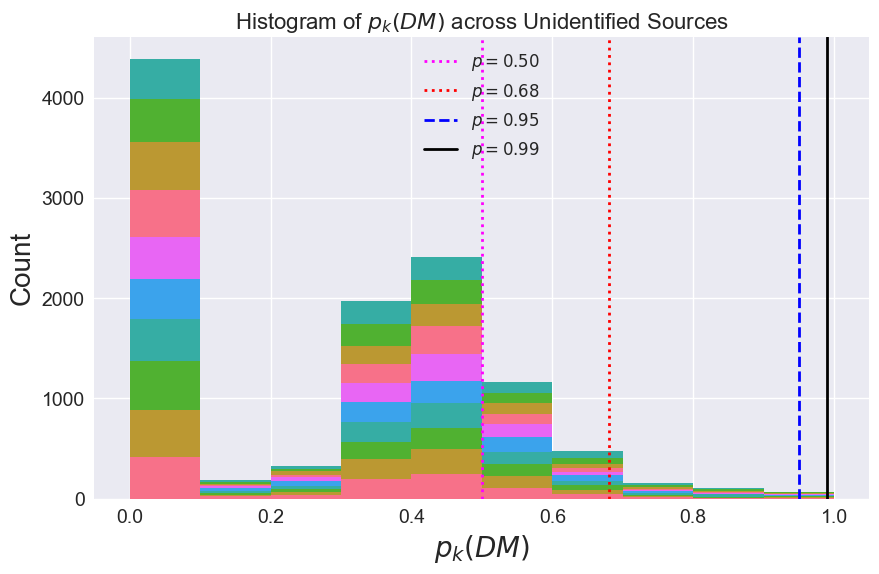

In [85]:
import matplotlib.pyplot as plt

# Histogram
bins = [i/10 for i in range(11)]
fig, ax = plt.subplots(figsize=(10, 6))
counts_all, bins_all, ignored = ax.hist(unids_DM_std_proba_N_sample_repeated_kfold[:, 1:(N_sample+1)],
                                         bins=bins, histtype='barstacked', density=False)

# Threshold lines
ax.axvline(0.50, color='magenta', linestyle=':', linewidth=2)
ax.axvline(0.68, color='red', linestyle=':', linewidth=2)
ax.axvline(0.95, color='blue', linestyle='--', linewidth=2)
ax.axvline(0.99, color='black', linestyle='-', linewidth=2)

# Labels and title
ax.set_xlabel(r'$p_k(DM)$', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title("Histogram of $p_k(DM)$ across Unidentified Sources", fontsize=16)
ax.legend(["$p = 0.50$", "$p = 0.68$", "$p = 0.95$", "$p = 0.99$"], fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save figure
# fig.savefig(f"full_histo_2F_{datetime.now():%Y%m%d_%H%M%S}.pdf", bbox_inches='tight')


# Análisis de consenso entre 3 diferentes ejecuciones - 2F

In [86]:
from scipy import stats

# Configuración
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 10)

# Cargar los resultados de las 3 ejecuciones
execution_1 = pd.read_csv('./TFG_analysis/2F/unid_dm_analysis_complete_results_2F_run1.csv')
execution_2 = pd.read_csv('./TFG_analysis/2F/unid_dm_analysis_complete_results_2F_run2.csv')
execution_3 = pd.read_csv('./TFG_analysis/2F/unid_dm_analysis_complete_results_2F_run3.csv')

print(f"Ejecución 1: {len(execution_1)} fuentes")
print(f"Ejecución 2: {len(execution_2)} fuentes") 
print(f"Ejecución 3: {len(execution_3)} fuentes")

# Verificar que todas las ejecuciones tienen las mismas fuentes
assert len(execution_1) == len(execution_2) == len(execution_3), "Las ejecuciones tienen diferente número de fuentes"

n_sources = len(execution_1)
print(f"Total de fuentes analizadas: {n_sources}")

Ejecución 1: 1125 fuentes
Ejecución 2: 1125 fuentes
Ejecución 3: 1125 fuentes
Total de fuentes analizadas: 1125


In [87]:
# Crear DataFrame combinado con las probabilidades de las 3 ejecuciones
consensus_df = pd.DataFrame({
    'Source_ID': execution_1['Source_ID'],
    'E_peak': execution_1['E_peak'],
    'Beta': execution_1['Beta'],
    'log_E_peak': execution_1['log_E_peak'],
    'log_Beta': execution_1['log_Beta'],
    'Prob_Run1': execution_1['Mean_Prob'],
    'Prob_Run2': execution_2['Mean_Prob'], 
    'Prob_Run3': execution_3['Mean_Prob'],
    'Std_Run1': execution_1['Std_Dev'],
    'Std_Run2': execution_2['Std_Dev'],
    'Std_Run3': execution_3['Std_Dev']
})

consensus_df['Source_ID'] = consensus_df['Source_ID'].astype(int)

# Calcular estadísticas de consenso entre ejecuciones
consensus_df['Mean_Prob_Consensus'] = consensus_df[['Prob_Run1', 'Prob_Run2', 'Prob_Run3']].mean(axis=1)
consensus_df['Std_Prob_Consensus'] = consensus_df[['Prob_Run1', 'Prob_Run2', 'Prob_Run3']].std(axis=1, ddof=1)
consensus_df['Min_Prob_Consensus'] = consensus_df[['Prob_Run1', 'Prob_Run2', 'Prob_Run3']].min(axis=1)
consensus_df['Max_Prob_Consensus'] = consensus_df[['Prob_Run1', 'Prob_Run2', 'Prob_Run3']].max(axis=1)

# Calcular incertidumbre promedio dentro de cada ejecución
consensus_df['Mean_Uncertainty_Consensus'] = consensus_df[['Std_Run1', 'Std_Run2', 'Std_Run3']].mean(axis=1)

print("Estadísticas de consenso calculadas:")
print(f"Probabilidad media general: {consensus_df['Mean_Prob_Consensus'].mean():.4f}")
print(f"Variabilidad entre ejecuciones: {consensus_df['Std_Prob_Consensus'].mean():.4f}")


Estadísticas de consenso calculadas:
Probabilidad media general: 0.2839
Variabilidad entre ejecuciones: 0.0051


In [88]:
# Imprimir el tipo de dato que es source_id
print(f"Tipo de dato de Source_ID: {consensus_df['Source_ID'].dtype}")

consensus_df.head(10)

Tipo de dato de Source_ID: int64


,Source_ID,E_peak,Beta,log_E_peak,log_Beta,Prob_Run1,Prob_Run2,Prob_Run3,Std_Run1,Std_Run2,Std_Run3,Mean_Prob_Consensus,Std_Prob_Consensus,Min_Prob_Consensus,Max_Prob_Consensus,Mean_Uncertainty_Consensus
0,96,8.26240,0.1120,0.917106,-0.950782,0.488857,0.532286,0.504038,0.075340,0.319722,0.322102,0.508393,0.022040,0.488857,0.532286,0.239055
1,110,0.34322,0.3537,-0.464427,-0.451365,0.467652,0.527295,0.503093,0.289900,0.319580,0.296916,0.499346,0.029998,0.467652,0.527295,0.302132
2,75,0.83632,0.4803,-0.077628,-0.318487,0.451099,0.496978,0.492790,0.222725,0.310531,0.288643,0.480289,0.025366,0.451099,0.496978,0.273966
3,33,10.80400,0.3954,1.033585,-0.402963,0.450620,0.488799,0.477786,0.093417,0.301930,0.088021,0.472402,0.019651,0.450620,0.488799,0.161123
4,785,0.78703,0.2986,-0.104009,-0.524910,0.439443,0.478616,0.472927,0.283732,0.071700,0.301214,0.463662,0.021166,0.439443,0.478616,0.218882
5,67,6.46150,0.1658,0.810333,-0.780415,0.439161,0.472889,0.471458,0.199705,0.231522,0.303762,0.461169,0.019073,0.439161,0.472889,0.244996
6,1010,58.71800,0.2163,1.768771,-0.664943,0.436239,0.461666,0.468959,0.285543,0.167507,0.221089,0.455621,0.017177,0.436239,0.468959,0.224713
7,560,1.43930,0.3499,0.158151,-0.456056,0.434692,0.459366,0.466546,0.281096,0.226757,0.288290,0.453534,0.016709,0.434692,0.466546,0.265381
8,146,11.49800,0.3400,1.060622,-0.468521,0.434277,0.457548,0.465744,0.158786,0.235660,0.091598,0.452523,0.016324,0.434277,0.465744,0.162015
9,363,1.23770,0.3505,0.092615,-0.455312,0.433146,0.457320,0.464806,0.241618,0.275185,0.137637,0.451757,0.016547,0.433146,0.464806,0.218147


In [89]:
# Definir criterios de robustez
MIN_PROB_THRESHOLD = 0.40  # Probabilidad mínima en todas las ejecuciones
MEAN_PROB_THRESHOLD = 0.45  # Probabilidad media entre ejecuciones
MAX_VARIABILITY = 0.15     # Máxima variabilidad entre ejecuciones

# Identificar candidatos robustos
robust_candidates = consensus_df[
    (consensus_df['Min_Prob_Consensus'] >= MIN_PROB_THRESHOLD) &
    (consensus_df['Mean_Prob_Consensus'] >= MEAN_PROB_THRESHOLD) &
    (consensus_df['Std_Prob_Consensus'] <= MAX_VARIABILITY)
].copy()

# Identificar candidatos consistentemente altos
consistent_high = consensus_df[
    (consensus_df['Mean_Prob_Consensus'] >= 0.45) &
    (consensus_df['Std_Prob_Consensus'] <= 0.10)
].copy()

# Identificar candidatos que aparecen en top 20 de todas las ejecuciones
top_20_run1 = set(execution_1.nlargest(20, 'Mean_Prob')['Source_ID'])
top_20_run2 = set(execution_2.nlargest(20, 'Mean_Prob')['Source_ID'])
top_20_run3 = set(execution_3.nlargest(20, 'Mean_Prob')['Source_ID'])

# Candidatos que aparecen en top 20 de al menos 2 ejecuciones
candidates_2_of_3 = (top_20_run1 & top_20_run2) | (top_20_run1 & top_20_run3) | (top_20_run2 & top_20_run3)
# Candidatos que aparecen en top 20 de todas las ejecuciones
candidates_all_3 = top_20_run1 & top_20_run2 & top_20_run3

print("ANÁLISIS DE ROBUSTEZ:")
print("="*50)
print(f"Candidatos robustos (criterios múltiples): {len(robust_candidates)}")
print(f"Candidatos consistentemente altos: {len(consistent_high)}")
print(f"Candidatos en top 20 de 2/3 ejecuciones: {len(candidates_2_of_3)}")
print(f"Candidatos en top 20 de 3/3 ejecuciones: {len(candidates_all_3)}")


ANÁLISIS DE ROBUSTEZ:
Candidatos robustos (criterios múltiples): 10
Candidatos consistentemente altos: 10
Candidatos en top 20 de 2/3 ejecuciones: 17
Candidatos en top 20 de 3/3 ejecuciones: 5


/var/folders/m8/9rd44wvx47j51lczw45sffl40000gn/T/ipykernel_11452/766363092.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax6.boxplot(prob_data, labels=['Ejec. 1', 'Ejec. 2', 'Ejec. 3'], patch_artist=True)


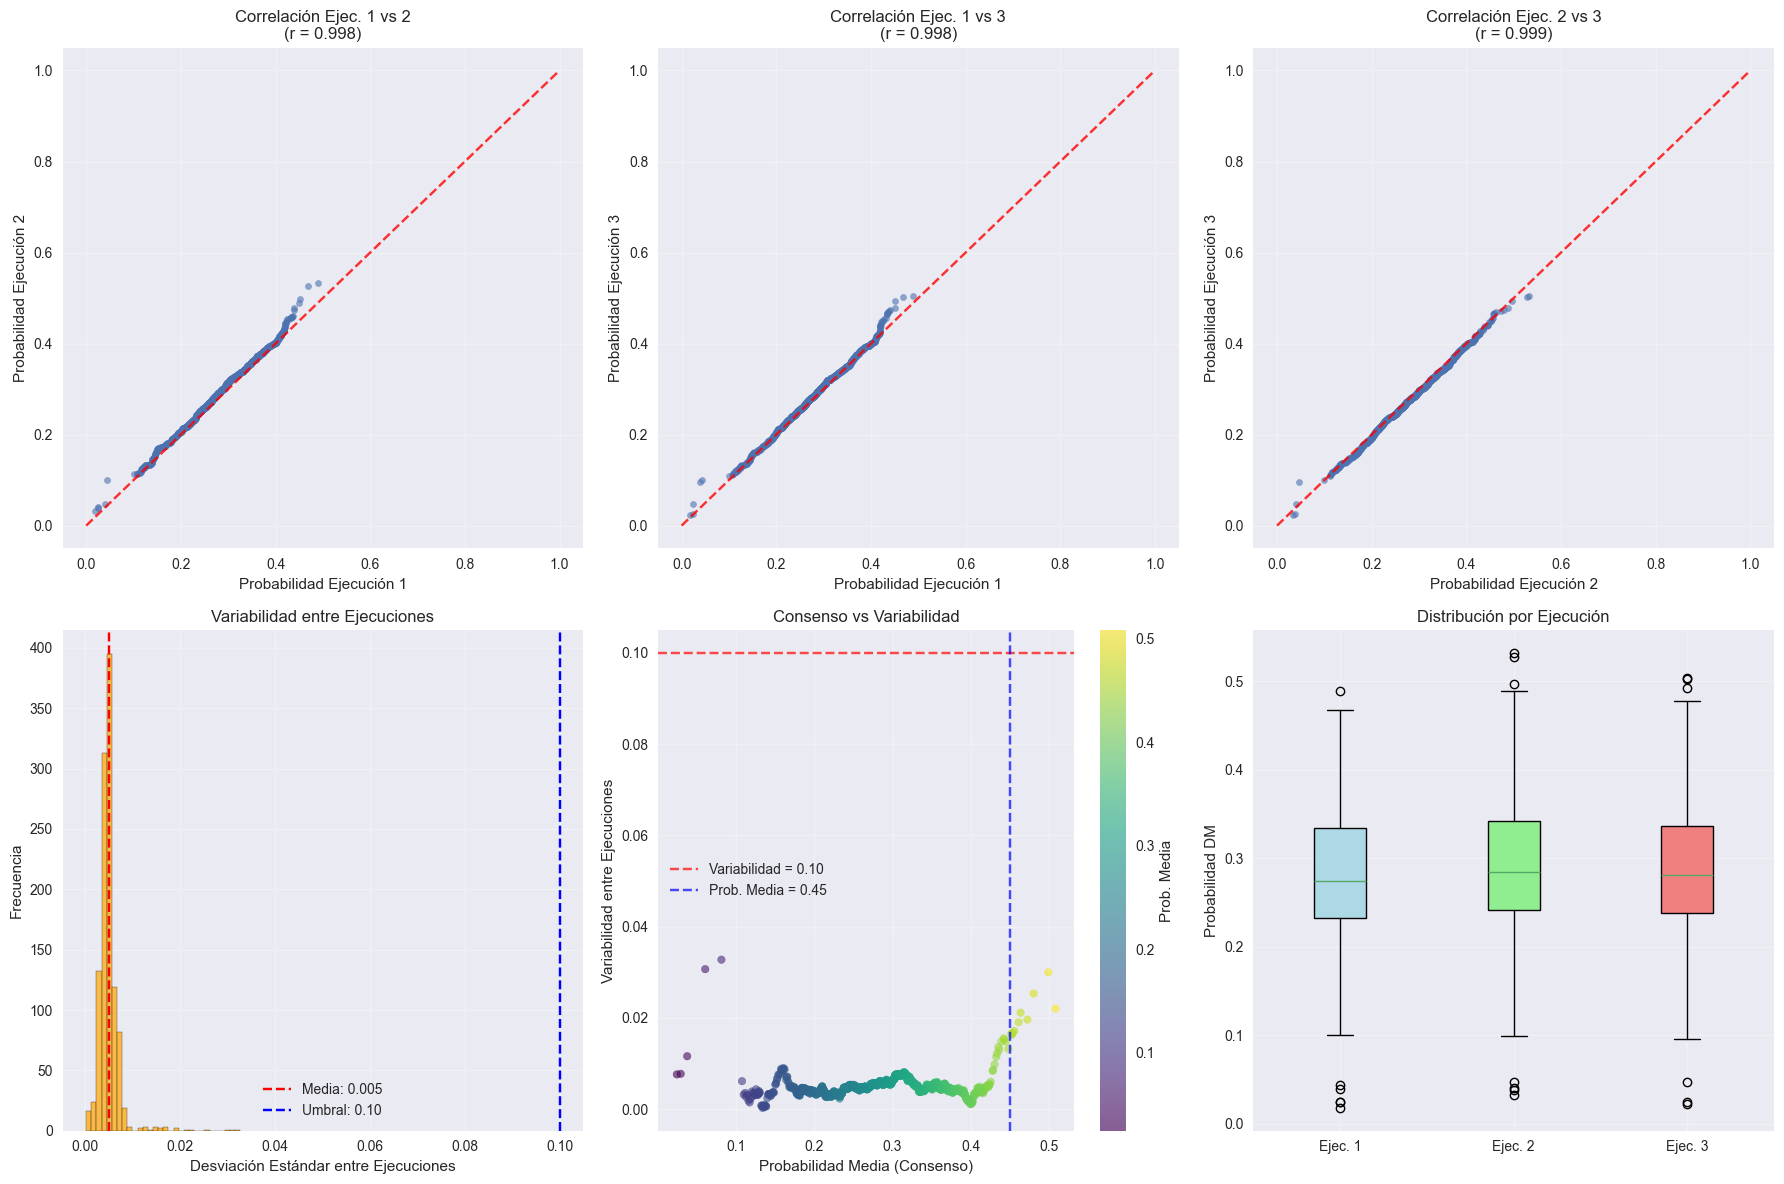

In [90]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Correlación entre ejecuciones (Run1 vs Run2)
ax1 = axes[0, 0]
ax1.scatter(consensus_df['Prob_Run1'], consensus_df['Prob_Run2'], alpha=0.6, s=20)
correlation_12 = consensus_df['Prob_Run1'].corr(consensus_df['Prob_Run2'])
ax1.plot([0, 1], [0, 1], 'r--', alpha=0.8)
ax1.set_xlabel('Probabilidad Ejecución 1')
ax1.set_ylabel('Probabilidad Ejecución 2')
ax1.set_title(f'Correlación Ejec. 1 vs 2\n(r = {correlation_12:.3f})')
ax1.grid(True, alpha=0.3)

# 2. Correlación Run1 vs Run3
ax2 = axes[0, 1]
ax2.scatter(consensus_df['Prob_Run1'], consensus_df['Prob_Run3'], alpha=0.6, s=20)
correlation_13 = consensus_df['Prob_Run1'].corr(consensus_df['Prob_Run3'])
ax2.plot([0, 1], [0, 1], 'r--', alpha=0.8)
ax2.set_xlabel('Probabilidad Ejecución 1')
ax2.set_ylabel('Probabilidad Ejecución 3')
ax2.set_title(f'Correlación Ejec. 1 vs 3\n(r = {correlation_13:.3f})')
ax2.grid(True, alpha=0.3)

# 3. Correlación Run2 vs Run3
ax3 = axes[0, 2]
ax3.scatter(consensus_df['Prob_Run2'], consensus_df['Prob_Run3'], alpha=0.6, s=20)
correlation_23 = consensus_df['Prob_Run2'].corr(consensus_df['Prob_Run3'])
ax3.plot([0, 1], [0, 1], 'r--', alpha=0.8)
ax3.set_xlabel('Probabilidad Ejecución 2')
ax3.set_ylabel('Probabilidad Ejecución 3')
ax3.set_title(f'Correlación Ejec. 2 vs 3\n(r = {correlation_23:.3f})')
ax3.grid(True, alpha=0.3)

# 4. Distribución de variabilidad entre ejecuciones
ax4 = axes[1, 0]
ax4.hist(consensus_df['Std_Prob_Consensus'], bins=30, alpha=0.7, color='orange', edgecolor='black')
ax4.axvline(consensus_df['Std_Prob_Consensus'].mean(), color='red', linestyle='--', 
           label=f'Media: {consensus_df["Std_Prob_Consensus"].mean():.3f}')
ax4.axvline(0.10, color='blue', linestyle='--', label='Umbral: 0.10')
ax4.set_xlabel('Desviación Estándar entre Ejecuciones')
ax4.set_ylabel('Frecuencia')
ax4.set_title('Variabilidad entre Ejecuciones')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Probabilidad media vs variabilidad
ax5 = axes[1, 1]
scatter = ax5.scatter(consensus_df['Mean_Prob_Consensus'], consensus_df['Std_Prob_Consensus'], 
                     alpha=0.6, c=consensus_df['Mean_Prob_Consensus'], cmap='viridis', s=30)
plt.colorbar(scatter, ax=ax5, label='Prob. Media')
ax5.axhline(0.10, color='red', linestyle='--', alpha=0.7, label='Variabilidad = 0.10')
ax5.axvline(0.45, color='blue', linestyle='--', alpha=0.7, label='Prob. Media = 0.45')
ax5.set_xlabel('Probabilidad Media (Consenso)')
ax5.set_ylabel('Variabilidad entre Ejecuciones')
ax5.set_title('Consenso vs Variabilidad')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Boxplot de probabilidades por ejecución
ax6 = axes[1, 2]
prob_data = [consensus_df['Prob_Run1'], consensus_df['Prob_Run2'], consensus_df['Prob_Run3']]
bp = ax6.boxplot(prob_data, labels=['Ejec. 1', 'Ejec. 2', 'Ejec. 3'], patch_artist=True)
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
ax6.set_ylabel('Probabilidad DM')
ax6.set_title('Distribución por Ejecución')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [91]:
# Ordenar por probabilidad media de consenso
consensus_df_sorted = consensus_df.sort_values('Mean_Prob_Consensus', ascending=False).reset_index(drop=True)

print("TOP 15 CANDIDATOS DE CONSENSO:")
print("="*80)
print("Source | Prob_Consensus | Variabilidad | Run1   | Run2   | Run3   | E_peak    | Beta")
print("-"*80)

"""
for i in range(min(15, len(consensus_df_sorted))):
    row = consensus_df_sorted.iloc[i]
    print(f"{row['Source_ID']:6d} | {row['Mean_Prob_Consensus']:12.4f} | {row['Std_Prob_Consensus']:10.4f} | "
          f"{row['Prob_Run1']:5.3f} | {row['Prob_Run2']:5.3f} | {row['Prob_Run3']:5.3f} | "
          f"{row['E_peak']:8.3e} | {row['Beta']:6.4f}")"""

# Análisis de candidatos que aparecen consistentemente en top rankings
print(f"\nCANDIDATOS EN TOP 20 DE TODAS LAS EJECUCIONES:")
print("="*50)
if candidates_all_3:
    for source_id in candidates_all_3:
        source_id = int(source_id)  # Asegurar que sea int
        row = consensus_df[consensus_df['Source_ID'] == source_id].iloc[0]
        mean_prob = float(row['Mean_Prob_Consensus'])
        std_prob = float(row['Std_Prob_Consensus'])
        print(f"Source {source_id:4d}: {mean_prob:.4f} ± {std_prob:.4f}")
else:
    print("No hay candidatos que aparezcan en el top 20 de todas las ejecuciones")

print(f"\nCANDIDATOS EN TOP 20 DE AL MENOS 2 EJECUCIONES:")
print("="*50)
for source_id in candidates_2_of_3:
    source_id = int(source_id)  # Asegurar que sea int
    row = consensus_df[consensus_df['Source_ID'] == source_id].iloc[0]
    mean_prob = float(row['Mean_Prob_Consensus'])
    std_prob = float(row['Std_Prob_Consensus'])
    # Verificar en cuántas ejecuciones aparece en top 20
    in_run1 = source_id in top_20_run1
    in_run2 = source_id in top_20_run2  
    in_run3 = source_id in top_20_run3
    runs_in_top20 = sum([in_run1, in_run2, in_run3])
    print(f"Source {source_id:4d}: {mean_prob:.4f} ± {std_prob:.4f} "
          f"(en {runs_in_top20}/3 ejecuciones)")

TOP 15 CANDIDATOS DE CONSENSO:
Source | Prob_Consensus | Variabilidad | Run1   | Run2   | Run3   | E_peak    | Beta
--------------------------------------------------------------------------------

CANDIDATOS EN TOP 20 DE TODAS LAS EJECUCIONES:
Source   96: 0.5084 ± 0.0220
Source  771: 0.4480 ± 0.0132
Source   67: 0.4612 ± 0.0191
Source   75: 0.4803 ± 0.0254
Source 1010: 0.4556 ± 0.0172

CANDIDATOS EN TOP 20 DE AL MENOS 2 EJECUCIONES:
Source  321: 0.3994 ± 0.0013 (en 2/3 ejecuciones)
Source   67: 0.4612 ± 0.0191 (en 3/3 ejecuciones)
Source  771: 0.4480 ± 0.0132 (en 3/3 ejecuciones)
Source   75: 0.4803 ± 0.0254 (en 3/3 ejecuciones)
Source  588: 0.4255 ± 0.0060 (en 2/3 ejecuciones)
Source  975: 0.4390 ± 0.0148 (en 2/3 ejecuciones)
Source  335: 0.4223 ± 0.0053 (en 2/3 ejecuciones)
Source  785: 0.4637 ± 0.0212 (en 2/3 ejecuciones)
Source  663: 0.3964 ± 0.0019 (en 2/3 ejecuciones)
Source  664: 0.4032 ± 0.0025 (en 2/3 ejecuciones)
Source   96: 0.5084 ± 0.0220 (en 3/3 ejecuciones)
Source   33

In [92]:
# Calcular métricas de estabilidad global
correlations = [correlation_12, correlation_13, correlation_23]
mean_correlation = np.mean(correlations)
std_correlation = np.std(correlations, ddof=1)

# Calcular coeficiente de variación promedio
cv_per_source = consensus_df['Std_Prob_Consensus'] / consensus_df['Mean_Prob_Consensus']
cv_per_source = cv_per_source[np.isfinite(cv_per_source)]  # Eliminar inf/nan
mean_cv = cv_per_source.mean()

# Concordancia en rankings (Kendall's tau)
from scipy.stats import kendalltau

# Crear rankings para cada ejecución
rank_1 = execution_1.sort_values('Mean_Prob', ascending=False)['Source_ID'].values
rank_2 = execution_2.sort_values('Mean_Prob', ascending=False)['Source_ID'].values  
rank_3 = execution_3.sort_values('Mean_Prob', ascending=False)['Source_ID'].values

# Calcular concordancia de rankings (solo top 100 para eficiencia)
top_n = min(100, len(rank_1))
tau_12, p_12 = kendalltau(rank_1[:top_n], rank_2[:top_n])
tau_13, p_13 = kendalltau(rank_1[:top_n], rank_3[:top_n])
tau_23, p_23 = kendalltau(rank_2[:top_n], rank_3[:top_n])

mean_tau = np.mean([tau_12, tau_13, tau_23])

print("MÉTRICAS DE ESTABILIDAD DEL MODELO:")
print("="*50)
print(f"Correlación promedio entre ejecuciones: {mean_correlation:.4f} ± {std_correlation:.4f}")
print(f"Coeficiente de variación promedio: {mean_cv:.4f}")
print(f"Concordancia de rankings (Kendall's τ): {mean_tau:.4f}")
print(f"Número de fuentes con variabilidad < 0.10: {(consensus_df['Std_Prob_Consensus'] < 0.10).sum()}")
print(f"Porcentaje de fuentes estables: {(consensus_df['Std_Prob_Consensus'] < 0.10).mean()*100:.1f}%")


MÉTRICAS DE ESTABILIDAD DEL MODELO:
Correlación promedio entre ejecuciones: 0.9986 ± 0.0005
Coeficiente de variación promedio: 0.0199
Concordancia de rankings (Kendall's τ): -0.0246
Número de fuentes con variabilidad < 0.10: 1125
Porcentaje de fuentes estables: 100.0%


In [93]:
# Guardar DataFrame de consenso
consensus_df_sorted.to_csv('./TFG_analysis/2F/consensus_analysis_ann_2f.csv', index=False)

# Generar reporte de consenso
report_content = f"""
{'='*80}
REPORTE DE CONSENSO - MODELO ANN 2F (3 EJECUCIONES)
{'='*80}

PARÁMETROS DEL ANÁLISIS:
- Número de fuentes analizadas: {n_sources}
- Número de ejecuciones independientes: 3
- Validación cruzada por ejecución: 5 folds × 2 repeticiones = 10 evaluaciones

ESTABILIDAD DEL MODELO:
- Correlación promedio entre ejecuciones: {mean_correlation:.4f} ± {std_correlation:.4f}
- Concordancia de rankings (Kendall's τ): {mean_tau:.4f}
- Coeficiente de variación promedio: {mean_cv:.4f}
- Fuentes con baja variabilidad (<0.10): {(consensus_df['Std_Prob_Consensus'] < 0.10).sum()} ({(consensus_df['Std_Prob_Consensus'] < 0.10).mean()*100:.1f}%)

ESTADÍSTICAS DE CONSENSO:
- Probabilidad media general: {consensus_df['Mean_Prob_Consensus'].mean():.4f} ± {consensus_df['Mean_Prob_Consensus'].std():.4f}
- Variabilidad media entre ejecuciones: {consensus_df['Std_Prob_Consensus'].mean():.4f}
- Rango de probabilidades: [{consensus_df['Mean_Prob_Consensus'].min():.4f}, {consensus_df['Mean_Prob_Consensus'].max():.4f}]

CANDIDATOS ROBUSTOS:
- Candidatos con criterios múltiples: {len(robust_candidates)}
- Candidatos en top 20 de todas las ejecuciones: {len(candidates_all_3)}
- Candidatos en top 20 de al menos 2 ejecuciones: {len(candidates_2_of_3)}

TOP 10 CANDIDATOS DE CONSENSO:
{'-'*50}
"""

for i in range(min(10, len(consensus_df_sorted))):
    row = consensus_df_sorted.iloc[i]
    source_id = int(row['Source_ID'])
    mean_prob = float(row['Mean_Prob_Consensus'])
    std_prob = float(row['Std_Prob_Consensus'])
    f_peak = float(row['E_peak'])
    beta = float(row['Beta'])
    
    report_content += f"Source {source_id:4d}: p={mean_prob:.4f}±{std_prob:.4f} "
    report_content += f"(F_peak={f_peak:.3e}, beta={beta:.4f})\n"

report_content += f"""

INTERPRETACIÓN:
- El modelo muestra {'alta' if mean_correlation > 0.8 else 'moderada' if mean_correlation > 0.6 else 'baja'} correlación entre ejecuciones (r={mean_correlation:.3f})
- La variabilidad promedio de {consensus_df['Std_Prob_Consensus'].mean():.3f} indica {'alta' if consensus_df['Std_Prob_Consensus'].mean() < 0.1 else 'moderada' if consensus_df['Std_Prob_Consensus'].mean() < 0.2 else 'baja'} estabilidad
- Se identificaron {len(candidates_2_of_3)} candidatos que aparecen consistentemente en rankings altos
"""

# Guardar reporte
with open('./TFG_analysis/2F/consensus_report_ann_2f.txt', 'w') as f:
    f.write(report_content)

print("ANÁLISIS COMPLETADO:")
print("- consensus_analysis_ann_2f.csv: Datos completos de consenso")
print("- consensus_report_ann_2f.txt: Reporte detallado")
print(f"\nCONCLUSIÓN PRINCIPAL:")
print(f"El modelo ANN 2F muestra correlación {mean_correlation:.3f} entre ejecuciones")
print(f"Se identificaron {len(candidates_2_of_3)} candidatos robustos para análisis posterior")

ANÁLISIS COMPLETADO:
- consensus_analysis_ann_2f.csv: Datos completos de consenso
- consensus_report_ann_2f.txt: Reporte detallado

CONCLUSIÓN PRINCIPAL:
El modelo ANN 2F muestra correlación 0.999 entre ejecuciones
Se identificaron 17 candidatos robustos para análisis posterior
